### Συσχέτιση Math PISA scores με τη σχετική αγοραστική δύναμη των εκπαιδευτικών ανά χώρα

Με motivation το post του @anamorfosis (ΣΓ)

https://x.com/anamorfosis/status/1826630883077701919

καθώς και διαβάζοντας πρόσφατα post για τους μισθούς των εκπαιδευτικών στην Ελλάδα,

έκανα την ακόλουθη ερώτηση στο ChatGPT "I need a table in csv format of PISA math scores for all countries and also please add a column with schoolteacher's purchasing power in each country". Τα αποτελέσματα σώθηκαν στο αρχείο math_vs_ppp_scores.csv. Επίσης το ChatGPT στην απάντηση του ανέφερε ότι "The purchasing power is typically represented as an index based on purchasing power parity (PPP), reflecting the relative cost of living and income level in each country.."


In [1]:
import csv
        
file = open("math_scores_vs_teacher_ppp.csv", "r")

data = list(csv.reader(file, delimiter=","))
file.close()

for item in data:
    print(item)

['Country/Region', 'PISA Math Score', "Schoolteacher's Purchasing Power (Index)"]
['China (Beijing/ Shanghai/ Jiangsu/ Zhejiang)', '591', '120']
['Singapore', '569', '115']
['Hong Kong (China)', '551', '110']
['Macao (China)', '558', '108']
['Taiwan', '531', '105']
['Japan', '527', '95']
['South Korea', '526', '100']
['Estonia', '523', '85']
['Netherlands', '519', '105']
['Poland', '516', '80']
['Switzerland', '515', '110']
['Canada', '512', '100']
['Finland', '507', '95']
['Ireland', '500', '105']
['Slovenia', '495', '80']
['Denmark', '509', '100']
['Belgium', '508', '100']
['Germany', '500', '95']
['Norway', '502', '105']
['United Kingdom', '502', '90']
['United States', '478', '85']
['France', '495', '90']
['Portugal', '492', '75']
['Italy', '487', '85']
['Spain', '481', '85']
['Russia', '488', '65']
['Australia', '491', '95']
['New Zealand', '494', '90']
['Sweden', '502', '90']
['Austria', '499', '95']
['Czech Republic', '499', '75']
['Hungary', '481', '70']
['Israel', '463', '85']

Πάμε να κάνουμε ένα plot των δεδομένων καθώς και να υπολογίσουμε το Spearman correlation coefficient $\rho$ που αξιολογεί το πόσο καλά μπορεί να περιγραφεί η σχέση μεταξύ των δύο μεταβλητών χρησιμοποιώντας μια μονότονη συνάρτηση.

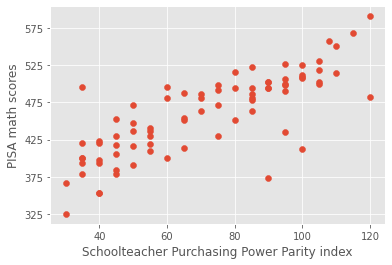

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
%matplotlib inline
plt.style.use('ggplot')

ppp = []
scores = []
for item in data[1:]:
    ppp.append(float(item[2]))
    scores.append(float(item[1]))

#Plot the results
plt.figure()
plt.yticks(np.arange(min(scores), max(scores)+1, 50.0))
plt.scatter(ppp,scores)
plt.xlabel('Schoolteacher Purchasing Power Parity index')
plt.ylabel('PISA math scores');


In [3]:
#Calculate the Spearman correlation coefficient
rho,p = spearmanr(ppp,scores)
print('Spearman correlation coefficient is ' + str(rho) + ' with p-value = ' + str(p))

Spearman correlation coefficient is 0.7968826783922323 with p-value = 1.5850827728433897e-18


Βρήκαμε $\rho$=0.8 δηλαδή θετική συσχέτιση που σημαίνει ότι το PISA math score αποτελεί αύξουσα συνάρτηση της σχετικής αγοραστικής δύναμης των εκπαιδευτικών. Η τιμή του $\rho$ μπορεί να χαρακτηριστεί ως very strong correlation.

Ως έλεγχο ας κάνουμε τους ίδιους υπολογισμούς αλλά αυτή τη φορά για τη γενική σχετική αγοραστική δύναμη κάθε χώρας όπως επίσης και για το GDP per capita.

Spearman correlation coefficient is 0.7078715597534104 with p-value = 2.993181907758656e-13


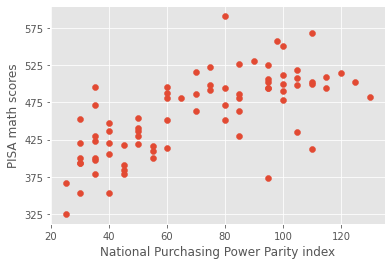

In [4]:
import csv
        
file = open("math_scores_vs_general_ppp.csv", "r")

data = list(csv.reader(file, delimiter=","))
file.close()
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
%matplotlib inline
plt.style.use('ggplot')

ppp = []
scores = []
for item in data[1:]:
    ppp.append(float(item[2]))
    scores.append(float(item[1]))

#Plot the results
plt.figure()
plt.yticks(np.arange(min(scores), max(scores)+1, 50.0))
plt.scatter(ppp,scores)
plt.xlabel('National Purchasing Power Parity index')
plt.ylabel('PISA math scores');

#Calculate the Spearman correlation coefficient
rho,p = spearmanr(ppp,scores)
print('Spearman correlation coefficient is ' + str(rho) + ' with p-value = ' + str(p))

Spearman correlation coefficient is 0.6598474734167074 with p-value = 3.7414425930533856e-11


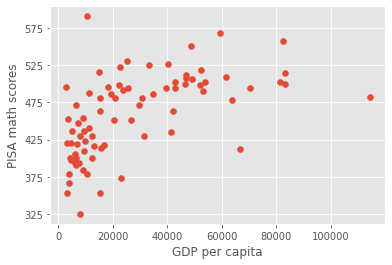

In [6]:
import csv
        
file = open("math_scores_vs_GDP_per_capita.csv", "r")

data = list(csv.reader(file, delimiter=","))
file.close()
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
%matplotlib inline
plt.style.use('ggplot')

ppp = []
scores = []
for item in data[1:]:
    ppp.append(float(item[2]))
    scores.append(float(item[1]))

#Plot the results
plt.figure()
plt.yticks(np.arange(min(scores), max(scores)+1, 50.0))
plt.scatter(ppp,scores)
plt.xlabel('GDP per capita')
plt.ylabel('PISA math scores');

#Calculate the Spearman correlation coefficient
rho,p = spearmanr(ppp,scores)
print('Spearman correlation coefficient is ' + str(rho) + ' with p-value = ' + str(p))

Προφανώς πλουσιότερες χώρες έχουν καλύτερα PISA scores αλλά η μεγαλύτερη θετική συσχέτιση που βρήκαμε αφορά ξεκάθαρα την αγοραστική δύναμη των εκπαιδευτικών.

Μετά από πρόταση του @anamorfosis ρωτήθηκε το ChatGPT για τα PISA math scores vs schoolteacher's salaries in PPP (PPP adjusts salaries to reflect their purchasing power relative to international standards). Ιδού και αυτή η ανάλυση...

Spearman correlation coefficient is 0.7060671368568954 with p-value = 3.6515262296441e-13


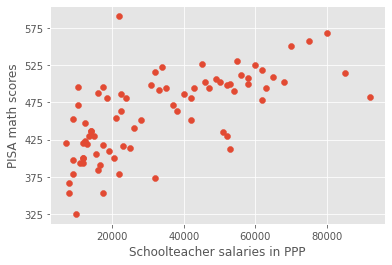

In [4]:
import csv
        
file = open("math_scores_vs_teacher_PPP_salaries.csv", "r")

data = list(csv.reader(file, delimiter=","))
file.close()
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
%matplotlib inline
plt.style.use('ggplot')

ppp = []
scores = []
for item in data[1:]:
    ppp.append(float(item[2]))
    scores.append(float(item[1]))

#Plot the results
plt.figure()
plt.yticks(np.arange(min(scores), max(scores)+1, 50.0))
plt.scatter(ppp,scores)
plt.xlabel('Schoolteacher salaries in PPP')
plt.ylabel('PISA math scores');

#Calculate the Spearman correlation coefficient
rho,p = spearmanr(ppp,scores)
print('Spearman correlation coefficient is ' + str(rho) + ' with p-value = ' + str(p))